In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

print(tf.__version__)

1.13.1


In [2]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

In [3]:
def build_model():
    model = keras.Sequential([
        Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        Dense(1)
    ])

    model.compile(optimizer='Adam', 
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model

In [4]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=2000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

rmse_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))
print('\nFinal Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.......................

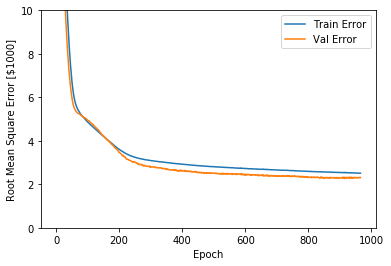

In [5]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Root Mean Square Error [\$1000]')
    plt.plot(hist['epoch'], np.sqrt(hist['mean_squared_error']), label='Train Error')
    plt.plot(hist['epoch'], np.sqrt(hist['val_mean_squared_error']), label = 'Val Error')
    plt.legend()
    plt.ylim([0,10])

plot_history()

In [6]:
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
print('Root Mean Square Error on test set: {}'.format(round(np.sqrt(mse), 3)))

102/102 [==============================] - 0s 96us/sample - loss: 17.7636 - mean_absolute_error: 2.6813 - mean_squared_error: 17.7636
Root Mean Square Error on test set: 4.215
